## 1. Explicación del bloque de código

### Instalación de librerías:

In [37]:
!pip install nltk spacy scikit-learn thefuzz stop_words fuzzywuzzy python-Levenshtein unidecode pyjarowinkler

**Propósito:** Instala las librerías necesarias para procesamiento de texto


(NLTK, spaCy), métricas de similitud (thefuzz, pyjarowinkler), y manejo de caracteres especiales (unidecode).

---

### Importación de bibliotecas:

> Agregar bloque entrecomillado



In [38]:
import re, nltk, spacy, pandas as pd, numpy as np
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

**Propósito:** Importa módulos para manipulación de texto, algoritmos de NLP, estructuras de datos y modelos de representación de texto (BoW, TF-IDF).

---

### Descarga de recursos NLTK y spaCy:

In [39]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
!python -m spacy download es_core_news_md
nlp = spacy.load("es_core_news_md")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Propósito**: Descarga modelos de lenguaje en español para tokenización, stopwords y capacidades avanzadas de spaCy (lematización, POS tagging, NER).

---



### Ejemplo de tokenización y normalización

In [40]:
text = "¡Hola! ¿Cómo estás?..."
words = word_tokenize(text.lower())

**Propósito:** Divide el texto en palabras individuales y las convierte a minúsculas.

---

### Limpieza con expresiones regulares:

In [41]:
text_clean = re.sub(r'[^a-zA-Záéíóúüñ ]', '', text.lower())

**Propósito:**Elimina caracteres no alfabéticos (como signos de puntuación) usando regex.

---




### Eliminación de stop words:

In [42]:
stop_words = set(stopwords.words('spanish'))
filtered_words = [word for word in words if word not in stop_words]

**Propósito:** Filtra palabras vacías (ej. "de", "y") que no aportan significado.

---

### Stemming y lematización:

In [43]:
stemmer = SnowballStemmer("spanish")
stemmed_words = [stemmer.stem(word) for word in filtered_words]

doc = nlp(" ".join(filtered_words))
lemmas = [token.lemma_ for token in doc]

**Stemming:** Reduce palabras a su raíz (ej. "corriendo" → "corr").

**Lematización:** Transforma palabras a su forma base usando contexto (ej. "corriendo" → "correr")

---


### Distancias entre strings:

In [44]:
from Levenshtein import distance as edit_distance
from pyjarowinkler import distance as jwdist

fuzz.ratio("casa", "casas")  # Similitud aproximada
edit_distance("pero", "perro")  # Distancia Levenshtein
jwdist.get_jaro_distance("pero", "perro")  # Similitud Jaro-Winkler

0.07

**Propósito:** Calcula similitudes entre palabras para tareas como corrección ortográfica.

---

### Representación de texto (BoW, TF-IDF, N-gramas):

In [45]:
vectorizer = CountVectorizer()  # BoW
vectorizer_tfidf = TfidfVectorizer()  # TF-IDF
vectorizer_ngram = CountVectorizer(ngram_range=(2,3))  # N-gramas

**Propósito:**Convierte texto en vectores numéricos para modelos de machine learning.

---

### POS Tagging y NER con spaCy:

In [46]:
[(token.text, token.pos_) for token in doc]  # Partes de la oración
[(ent.text, ent.label_) for ent in doc.ents]  # Entidades (ej. lugares, personas)

[('¡hola ! ¿cómo ?', 'MISC')]

**Propósito**: Identifica categorías gramaticales y entidades nombradas en el texto.

---
---


## 2. Sustitución del conjunto de datos

**Paso 1:** Define tus propios textos en una lista. Por ejemplo:

In [47]:
texts = [
    "La inteligencia artificial revoluciona la medicina.",
    "Los coches autónomos utilizan algoritmos de visión por computadora.",
    "Python es el lenguaje más popular para ciencia de datos."
]

**Paso 2:** Reemplaza las variables existentes (como texts o doc2) con tus datos. Por ejemplo:

In [48]:
# En lugar de:
texts = ["El gato come pescado", "El perro ladra en la casa"]

# Usa:
texts = [
    "La inteligencia artificial revoluciona la medicina.",
    "Los coches autónomos utilizan algoritmos de visión por computadora."
]

---
---


## 3. Mejoras al código

### A. Funciones reutilizables:

In [49]:
def preprocess_text(text):
    # Limpieza
    text_clean = re.sub(r'[^a-zA-Záéíóúüñ ]', '', text.lower())
    # Tokenización y stopwords
    words = word_tokenize(text_clean)
    filtered_words = [word for word in words if word not in stop_words]
    # Lematización
    doc = nlp(" ".join(filtered_words))
    return [token.lemma_ for token in doc]

# Ejemplo:
preprocessed = preprocess_text("¡Hola! ¿Cómo estás?")

### B. Visualización mejorada de DataFrames:

In [50]:
# BoW con nombres de características
# Assuming 'texts' is your list of text documents and 'vectorizer' is your CountVectorizer instance
X = vectorizer.fit_transform(texts) # Fit the vectorizer and transform your texts into a matrix

bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
bow_df.style.background_gradient(cmap='Blues')  # Resaltar valores altos

### C. Manejo de errores:

In [51]:
try:
    doc = nlp(sentence)
except Exception as e:
    print(f"Error al procesar el texto: {e}")

Error al procesar el texto: name 'sentence' is not defined


### D. Optimización con spaCy pipelines:

In [52]:
# Procesar múltiples textos de forma eficiente
docs = list(nlp.pipe(texts))  # Mejor rendimiento para grandes volúmenes

### E. Exportar resultados:

In [53]:
# Assuming 'texts' is your list of text documents and 'vectorizer_tfidf' is your TfidfVectorizer instance
X_tfidf = vectorizer_tfidf.fit_transform(texts) # Calculate TF-IDF matrix

# Guardar DataFrame en CSV
pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out()).to_csv("tfidf.csv")

### F. Ejemplo completo con datos nuevos:

In [56]:
# Datos personalizados
texts = [
    "Para neutralizar una fuerza se necesita una de igual intensidad y sentido contrario",
    "En la conciencia de millones de hombres y mujeres, la noticia tardará en volverse tolerable.",
    "La física cuántica desafía nuestra comprensión clásica de la realidad."
]

# Asegurarse de tener la función de preprocesamiento correcta
def preprocess_text(texto):
    """
    Función mejorada de preprocesamiento:
    1. Limpieza con regex
    2. Normalización
    3. Eliminación de stopwords
    4. Lematización
    """
    # Limpieza de caracteres especiales
    texto_limpio = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ ]', '', texto)
    # Normalización
    texto_limpio = unidecode.unidecode(texto_limpio.lower())
    # Tokenización
    tokens = word_tokenize(texto_limpio, language='spanish')
    # Eliminación de stopwords y palabras cortas
    stop_words = set(stopwords.words('spanish'))
    tokens_filtrados = [token for token in tokens if token not in stop_words and len(token) > 2]
    # Lematización
    doc = nlp(" ".join(tokens_filtrados))
    return [token.lemma_ for token in doc if not token.is_punct]

# Preprocesamiento
preprocessed_texts = [preprocess_text(t) for t in texts]

# BoW con parámetros mejorados
vectorizer = CountVectorizer(
    max_features=20,  # Limitar a las 20 palabras más frecuentes
    ngram_range=(1, 2)  # Incluir unigramas y bigramas
)
X = vectorizer.fit_transform([" ".join(t) for t in preprocessed_texts])

# DataFrame con estilo para mejor visualización
bow_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=[f"Texto {i+1}" for i in range(len(texts))]
)

# Mostrar resultados con resaltado
print("Matriz BoW con las 20 palabras más relevantes:")
display(bow_df.style.background_gradient(cmap='Blues', axis=1))

Matriz BoW con las 20 palabras más relevantes:


**Resultado:** Un código más modular, eficiente y adaptable a distintos conjuntos de datos.

---
---

## 4. Pasos siguientes:
Esta matriz BoW (Bag of Words) obtenida es la representación numérica de los textos y tiene múltiples aplicaciones.

### 1. Entender la estructura de los datos

In [57]:
# Ver las palabras más relevantes
print("Palabras clave:", vectorizer.get_feature_names_out())

# Ver distribución de frecuencias
word_counts = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
word_counts.sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 palabras');

Palabras clave: ['clasica' 'intensidad' 'intensidad contrario' 'millones'
 'millones hombre' 'mujer' 'mujer noticia' 'necesitar' 'necesitar igual'
 'neutralizar' 'neutralizar fuerza' 'noticia' 'noticia tardarar'
 'realidad' 'tardarar' 'tardarar volver' 'tolerable' 'volver' 'volver él'
 'él']


### 2. Alimentar modelos de Machine Learning

In [58]:
from sklearn.cluster import KMeans

# Ejemplo: Agrupar textos en 2 categorías
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)
print("Grupos asignados:", clusters)

Grupos asignados: [1 0 1]


### 3. Análisis de similitud entre documentos

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Matriz de similitud entre textos
sim_matrix = cosine_similarity(X)
pd.DataFrame(sim_matrix,
            index=[f"Texto {i+1}" for i in range(len(texts))],
            columns=[f"Texto {i+1}" for i in range(len(texts))])

Texto 1  Texto 2  Texto 3
Texto 1      1.0      0.0      0.0
Texto 2      0.0      1.0      0.0
Texto 3      0.0      0.0      1.0

from matplotlib import pyplot as plt
_df_0['Texto 1'].plot(kind='hist', bins=20, title='Texto 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Texto 2'].plot(kind='hist', bins=20, title='Texto 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Texto 3'].plot(kind='hist', bins=20, title='Texto 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Texto 1', y='Texto 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Texto 2', y='Texto 3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Texto 3']
  ys = series['Texto 1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Texto 3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Texto 3')
_ = plt.ylabel('Texto 1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Texto 3']
  ys = series['Texto 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Texto 3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Texto 3')
_ = plt.ylabel('Texto 2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Texto 3']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Texto 3'}, axis=1)
              .sort_values('Texto 3', ascending=True))
  xs = counted['Texto 3']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Texto 3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Texto 3')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Texto 1'].plot(kind='line', figsize=(8, 4), title='Texto 1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Texto 2'].plot(kind='line', figsize=(8, 4), title='Texto 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Texto 3'].plot(kind='line', figsize=(8, 4), title='Texto 3')
plt.gca().spines[['top', 'right']].set_visible(False)

### 4. Visualización temática

🔍 Análisis individual de textos:


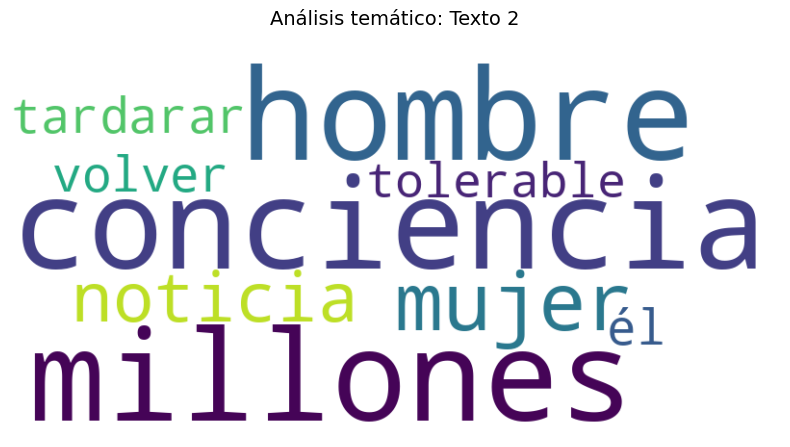

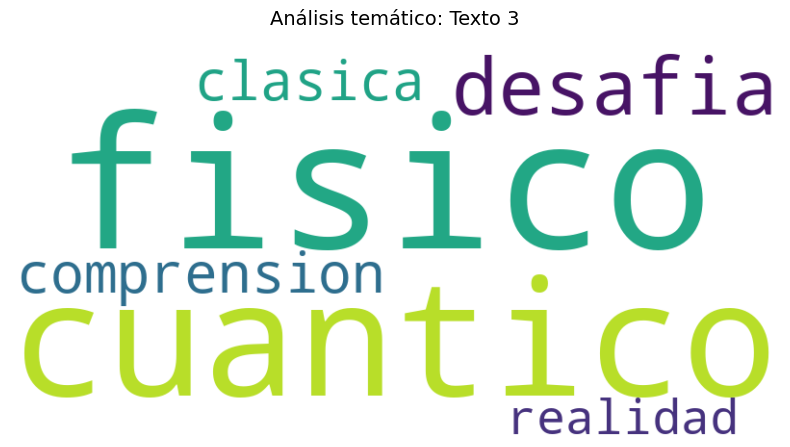


🌍 Visión global de todos los textos:


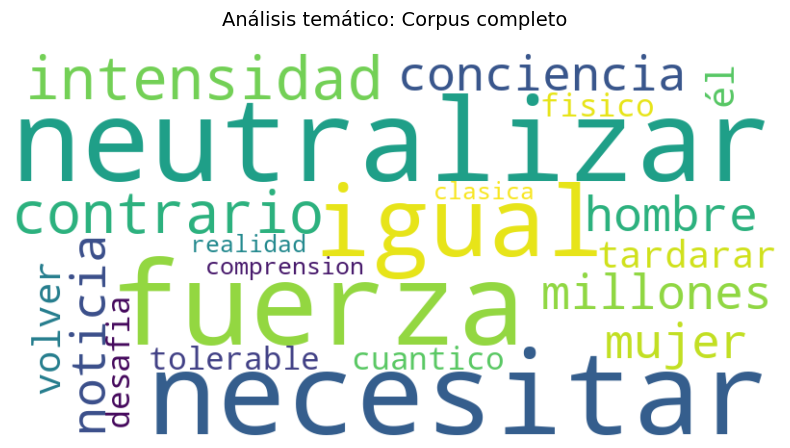

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configuración del estilo
plt.style.use('ggplot')
COLOR_MAP = 'viridis'  # Otros buenos colormaps: 'plasma', 'inferno', 'magma'

# Función para crear wordclouds personalizadas
def create_wordcloud(text, title, max_words=50):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=COLOR_MAP,
        max_words=max_words,
        contour_width=1,
        contour_color='steelblue'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Análisis temático: {title}', fontsize=14, pad=20)
    plt.axis("off")
    plt.show()

# Generar nubes para cada texto individual
print("🔍 Análisis individual de textos:")
for i, text in enumerate(preprocessed_texts):
    full_text = ' '.join(text)
    if len(full_text) > 0:  # Evitar textos vacíos
        create_wordcloud(full_text, f"Texto {i+1}")
    else:
        print(f"⚠️ Texto {i+1} no contiene palabras válidas después del preprocesamiento")

# Generar nube global de todos los textos
print("\n🌍 Visión global de todos los textos:")
all_texts = ' '.join([' '.join(t) for t in preprocessed_texts])
create_wordcloud(all_texts, "Corpus completo", max_words=100)

### 5. Entrenar modelos predictivos

In [65]:
from sklearn.naive_bayes import MultinomialNB

# Ejemplo ficticio: Clasificar textos (necesitarías etiquetas)
etiquetas = [0, 1, 0]  # 0 = Física, 1 = Filosofía
modelo = MultinomialNB().fit(X, etiquetas)

### 6. Mejorar la representación (Opcional)

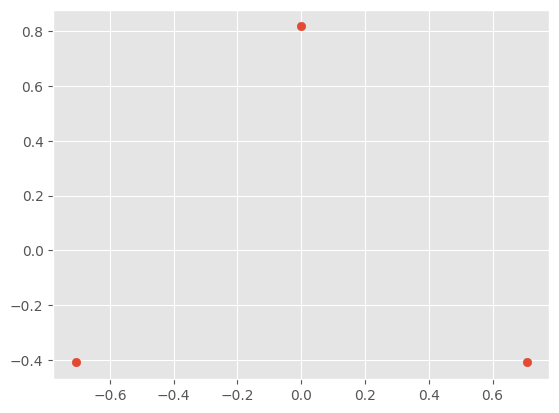

In [66]:
# Convertir a TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit_transform(X)

# Reducir dimensionalidad (para visualización)
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(tfidf.toarray())
plt.scatter(pca[:,0], pca[:,1]);